In [ ]:
%%capture
!pip install rdkit

In [ ]:
from rdkit import Chem

Fala galera!

Meu nome é Victória e sejam bem-vindos ao canal do Youtube da for_code! Nós somos a liga de computação da Escola de Química da UFRJ e esse vídeo faz parte de uma Playlist sobre a biblioteca RDKit, de química orgânica.

Quem é da química sabe que a pior parte de orgânica são os desenhos, né? Então, na aula de hoje vamos falar sobre como desenhar moléculas utilizando essa biblioteca! Quer facilitar sua vida? Então continua assistindo o vídeo!

Para desenhar as moléculas, nós utilizamos o *módulo* **Draw**. Então, o primeiro passo, é importar esse módulo para o nosso código




In [ ]:
from rdkit.Chem import Draw

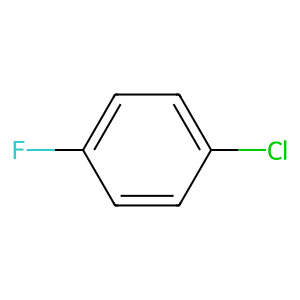

In [ ]:
smi = 'c1cc(F)ccc1Cl'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('ClccccF')
hit_ats = list(mol.GetSubstructMatch(patt))
hit_bonds = []
for bond in patt.GetBonds():
   aid1 = hit_ats[bond.GetBeginAtomIdx()]
   aid2 = hit_ats[bond.GetEndAtomIdx()]
   hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

#Use o método MolToImage para gerar a imagem

img = Draw.MolToImage(mol, size=(300,300), wedgeBonds=True, kekulize=True, wedgeInChiralBonds= True, wedgeStereoBonds=True, highlightsAtoms=hit_ats, highlightsBonds=hit_bonds)

img

Os átomos de uma molécula podem ser destacados desenhando um sólido colorido ou um círculo aberto ao redor deles. As ligações também podem ter um contorno colorido aplicado.

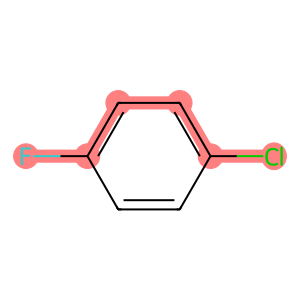

In [ ]:
colours = [(0.8,0.0,0.8),(0.8,0.8,0),(0,0.8,0.8),(0,0,0.8)]
atom_cols = {}
for i, at in enumerate(hit_ats):
    atom_cols[at] = colours[i%4]
bond_cols = {}
for i, bd in enumerate(hit_bonds):
    bond_cols[bd] = colours[3 - i%4]
img = Draw.MolToImage(mol, size=(300,300), highlightAtoms=hit_ats,
                                   highlightAtomColors=atom_cols,
                                   highlightBonds=hit_bonds,
                                   highlightBondColors=bond_cols)
img

Também é possível especificar as cores dos átomos e das ligações. Os Átomos e ligações também podem ser destacados com múltiplas cores, por exemplo, se corresponderem a mais de um padrão de subestrutura.

Outro recurso interesse que temos com essa biblioteca é a possibilidade de gerar e armazenar coordenadas da molécula usando a *funcionalidade* do **rdkit.Chem.AllChem**. Ou seja,nós podemos inserir uma representação 2D.

O primeiro passo, como sempre, é importar esse módulo para o nosso código

In [ ]:
from rdkit.Chem import AllChem
#AllChem.Compute2DCoords(m2)

Nós também podemos utilizar a *função* **Draw.MolToFile(molécula, ‘nomedoarquivo.png’)**. Basicamente, essa função vai gerar o desenho da molécula e transformar em um arquivo.


Nós também anotar informações nos átomos e ligações no desenho. Essas strings são adicionadas com propriedades **atomNote e bondNote** e serão colocadas automaticamente próximas ao átomo ou ligação de forma a minimizar o conflito com o desenho. Nós temos três sinalizadores em **MolDraw2DOptions** que adicionarão informações estereoquímicas (R/S para átomos, E/Z para ligações) e números de sequência de átomos e ligações.

In [ ]:
from rdkit.Chem.Draw import rdMolDraw2D


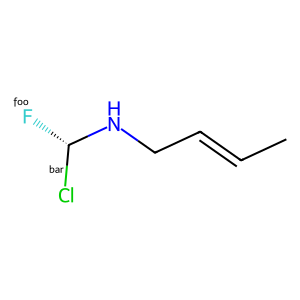

In [ ]:
mol = Chem.MolFromSmiles('Cl[C@H](F)NC\C=C\C')
d = rdMolDraw2D.MolDraw2DCairo(250, 200) # or MolDraw2DSVG to get SVGs
mol.GetAtomWithIdx(2).SetProp('atomNote', 'foo')
mol.GetBondWithIdx(0).SetProp('bondNote', 'bar')
d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('atom_annotation_1.png')

img = Draw.MolToImage(mol, size=(300,300), wedgeBonds=True, kekulize=True, wedgeInChiralBonds= True, wedgeStereoBonds=True, highlightsAtoms=hit_ats, highlightsBonds=hit_bonds)
img

Se os átomos tiverem uma propriedade atomLabel definida, nós usamos:

[19:23:22] Failed to write PNG file ./images/atom_labels_1.png


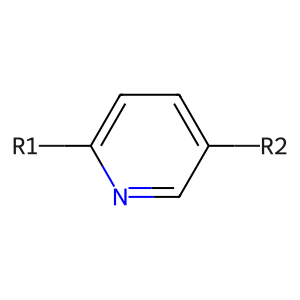

In [ ]:
smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|'
mol = Chem.MolFromSmiles(smi)
mol.GetAtomWithIdx(3).GetProp("atomLabel")
'R1'
mol.GetAtomWithIdx(7).GetProp("atomLabel")
'R2'
d = rdMolDraw2D.MolDraw2DCairo(250, 250)
rdMolDraw2D.PrepareAndDrawMolecule(d,mol)
d.WriteDrawingText("./images/atom_labels_1.png")

img = Draw.MolToImage(mol, size=(300,300),
                      wedgeBonds=True,
                      kekulize=True,
                      wedgeInChiralBonds= True,
                      wedgeStereoBonds=True,
                      highlightsAtoms=hit_ats,
                      highlightsBonds=hit_bonds)
img

Se você quiser fornecer o seu próprio rótulo para os átomos, você pode usar a propriedade **_displayLabel**

[22:02:27] Failed to write PNG file ./images/atom_labels_2.png


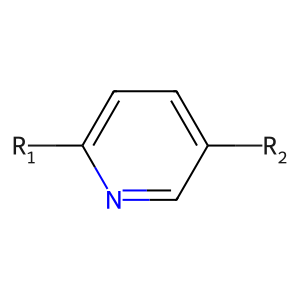

In [ ]:
smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|'
mol = Chem.MolFromSmiles(smi)
mol.GetAtomWithIdx(3).SetProp("_displayLabel","R<sub>1</sub>")
mol.GetAtomWithIdx(7).SetProp("_displayLabel","R<sub>2</sub>")
d = rdMolDraw2D.MolDraw2DCairo(250, 250)
rdMolDraw2D.PrepareAndDrawMolecule(d,mol)
d.WriteDrawingText("./images/atom_labels_2.png")

img = Draw.MolToImage(mol, size=(300,300),
                      wedgeBonds=True,
                      kekulize=True,
                      wedgeInChiralBonds= True,
                      wedgeStereoBonds=True,
                      highlightsAtoms=hit_ats,
                      highlightsBonds=hit_bonds)
img

Os arquivos PNG gerados pela classe MolDraw2DCairo por padrão incluem metadados sobre a(s) molécula(s) ou reação química incluída no desenho. Esses metadados podem ser usados posteriormente para reconstruir a(s) molécula(s) ou reação.

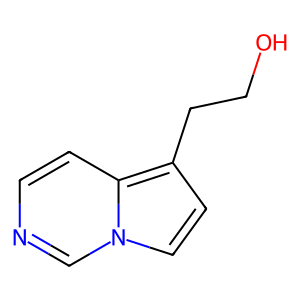

In [ ]:
template = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(template)
0
ms = [Chem.MolFromSmiles(smi) for smi in ('OCCc1ccn2cnccc12','C1CC1Oc1cc2ccncn2c1','CNC(=O)c1nccc2cccn12')]
_ = [AllChem.GenerateDepictionMatching2DStructure(m,template) for m in ms]
d = rdMolDraw2D.MolDraw2DCairo(250, 200)
d.DrawMolecule(ms[0])
d.FinishDrawing()
png = d.GetDrawingText()
mol = Chem.MolFromPNGString(png)
Chem.MolToSmiles(mol)
'OCCc1c2ccncn2cc1'

img = Draw.MolToImage(mol, size=(300,300),
                      wedgeBonds=True,
                      kekulize=True,
                      wedgeInChiralBonds= True,
                      wedgeStereoBonds=True,
                      highlightsAtoms=hit_ats,
                      highlightsBonds=hit_bonds)
img